In [3]:
import os
import random
import pandas as pd
import numpy as np
import pubchempy as pcp
from rdkit import Chem
from compute_fp_note import Compute_FP
from tensorflow.keras.models import load_model
from rdkit.Chem import Lipinski
from rdkit.Chem import Descriptors

In [11]:
pubchem = pd.read_csv(os.path.join('..', 'data', '01_raw', 'PubChem_compound_list.csv'))

In [12]:
labeled_cids = list(pubchem['cid'])
random_cids = []
while len(random_cids) < 10000:
    i = random.randint(2, 15000000)
    if i not in labeled_cids:
        random_cids.append(i)

In [13]:
len(random_cids)

10000

In [14]:
p = pcp.Compound.from_cid(1)

In [15]:
p.isomeric_smiles

'CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C'

In [16]:
def get_smiles(cid):
    try:
        compound = pcp.Compound.from_cid(cid)
        return compound.isomeric_smiles
    except:
        'no smiles found'
        return None

In [17]:
get_smiles(2)

'CC(=O)OC(CC(=O)O)C[N+](C)(C)C'

In [18]:
randoms = pd.DataFrame()

In [19]:
randoms['cid'] = random_cids

In [20]:
randoms['smiles'] = randoms['cid'].map(get_smiles)

In [ ]:
randoms.to_pickle('randoms_no_preds.pickle')

In [231]:
randoms.head()

,cid,smiles
0,13573036,CC1=C(C=C(N1C)C2=CC=CC=C2)C=NC3=CC=C(C=C3)[N+]...
1,1230264,C1C[C@H]2[C@@H]3CN(C[C@@H]3[C@@H]1C2OC(=O)C4=C...
2,7079270,C[NH+]1CCC2=C(C1)C(=C3C(=C2C(=O)/C=C/C4=C(C(=C...
3,6136287,CCOC1=C(C=C(C=C1)/C=C\2/C(=O)N(C(=S)S2)C3=C(C=...
4,7961650,C[C@@H](C(=O)C1=CC=C(C=C1)F)OC(=O)CNS(=O)(=O)C...


In [1]:
def get_rdkit_molecule(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return mol
    except:
        print('no molecule found')
        return None

In [2]:
get_rdkit_molecule(randoms['smiles'][1])

NameError: name 'randoms' is not defined

In [234]:
randoms['molecule'] = randoms['smiles'].map(get_rdkit_molecule)

no molecule found


[08:43:58] WARNING: not removing hydrogen atom without neighbors
[08:43:58] WARNING: not removing hydrogen atom without neighbors


no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found


[08:43:59] WARNING: not removing hydrogen atom without neighbors
[08:43:59] WARNING: not removing hydrogen atom without neighbors


no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecule found
no molecul

In [235]:
randoms.head()

,cid,smiles,molecule
0,13573036,CC1=C(C=C(N1C)C2=CC=CC=C2)C=NC3=CC=C(C=C3)[N+]...,<rdkit.Chem.rdchem.Mol object at 0x000001757ED...
1,1230264,C1C[C@H]2[C@@H]3CN(C[C@@H]3[C@@H]1C2OC(=O)C4=C...,<rdkit.Chem.rdchem.Mol object at 0x000001757C7...
2,7079270,C[NH+]1CCC2=C(C1)C(=C3C(=C2C(=O)/C=C/C4=C(C(=C...,<rdkit.Chem.rdchem.Mol object at 0x000001757C7...
3,6136287,CCOC1=C(C=C(C=C1)/C=C\2/C(=O)N(C(=S)S2)C3=C(C=...,<rdkit.Chem.rdchem.Mol object at 0x000001757C7...
4,7961650,C[C@@H](C(=O)C1=CC=C(C=C1)F)OC(=O)CNS(=O)(=O)C...,<rdkit.Chem.rdchem.Mol object at 0x000001757C7...


In [4]:
with open(os.path.join('..', 'data', '05_model_input', 'selected_fp.txt')) as file:
            selected_fp = file.readline()

In [5]:
one_mol = randoms['molecule'][1]

NameError: name 'randoms' is not defined

In [6]:
selected_fp

'Morgan2FP'

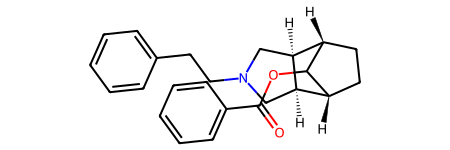

In [239]:
one_mol

In [240]:
computer = Compute_FP()

In [241]:
computer.relate_fp_functions(selected_fp, one_mol)

array([0, 0, 0, ..., 0, 0, 0])

In [242]:
def get_fp(mol):
    return computer.relate_fp_functions(selected_fp, mol)

In [243]:
get_fp(one_mol)

array([0, 0, 0, ..., 0, 0, 0])

In [244]:
randoms['fingerprints'] = randoms['molecule'].map(get_fp)

Something went wrong computing Morgan fingerprints
Something went wrong computing Morgan fingerprints
Something went wrong computing Morgan fingerprints
Something went wrong computing Morgan fingerprints
Something went wrong computing Morgan fingerprints
Something went wrong computing Morgan fingerprints
Something went wrong computing Morgan fingerprints
Something went wrong computing Morgan fingerprints
Something went wrong computing Morgan fingerprints
Something went wrong computing Morgan fingerprints
Something went wrong computing Morgan fingerprints
Something went wrong computing Morgan fingerprints
Something went wrong computing Morgan fingerprints
Something went wrong computing Morgan fingerprints
Something went wrong computing Morgan fingerprints
Something went wrong computing Morgan fingerprints
Something went wrong computing Morgan fingerprints
Something went wrong computing Morgan fingerprints
Something went wrong computing Morgan fingerprints
Something went wrong computing 

In [99]:
randoms.head()

,cid,smiles,molecule,fingerprints,HBondAcceptorCount,HBondDonorCount,MolecularWeight,LogP,RuleFive,predictions,probabilities
0,13573036,CC1=C(C=C(N1C)C2=CC=CC=C2)C=NC3=CC=C(C=C3)[N+]...,<rdkit.Chem.rdchem.Mol object at 0x000001E4E78...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,0,319.364,4.65932,1,1,0.541103
1,1230264,C1C[C@H]2[C@@H]3CN(C[C@@H]3[C@@H]1C2OC(=O)C4=C...,<rdkit.Chem.rdchem.Mol object at 0x000001E4E78...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,0,361.485,4.04250,1,8,0.265814
2,7079270,C[NH+]1CCC2=C(C1)C(=C3C(=C2C(=O)/C=C/C4=C(C(=C...,<rdkit.Chem.rdchem.Mol object at 0x000001E4E78...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,1,412.462,1.90800,1,7,0.278200
3,6136287,CCOC1=C(C=C(C=C1)/C=C\2/C(=O)N(C(=S)S2)C3=C(C=...,<rdkit.Chem.rdchem.Mol object at 0x000001E4E78...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",5,0,399.537,5.11654,1,1,0.485549
4,7961650,C[C@@H](C(=O)C1=CC=C(C=C1)F)OC(=O)CNS(=O)(=O)C...,<rdkit.Chem.rdchem.Mol object at 0x000001E4E78...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,1,383.372,2.05770,1,1,0.289264


In [100]:
randoms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9936 entries, 0 to 9955
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cid                 9936 non-null   int64  
 1   smiles              9936 non-null   object 
 2   molecule            9936 non-null   object 
 3   fingerprints        9936 non-null   object 
 4   HBondAcceptorCount  9936 non-null   int64  
 5   HBondDonorCount     9936 non-null   int64  
 6   MolecularWeight     9936 non-null   float64
 7   LogP                9936 non-null   float64
 8   RuleFive            9936 non-null   int32  
 9   predictions         9936 non-null   int64  
 10  probabilities       9936 non-null   float32
dtypes: float32(1), float64(2), int32(1), int64(4), object(3)
memory usage: 853.9+ KB


In [101]:
randoms = randoms.dropna()

In [102]:
randoms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9936 entries, 0 to 9955
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cid                 9936 non-null   int64  
 1   smiles              9936 non-null   object 
 2   molecule            9936 non-null   object 
 3   fingerprints        9936 non-null   object 
 4   HBondAcceptorCount  9936 non-null   int64  
 5   HBondDonorCount     9936 non-null   int64  
 6   MolecularWeight     9936 non-null   float64
 7   LogP                9936 non-null   float64
 8   RuleFive            9936 non-null   int32  
 9   predictions         9936 non-null   int64  
 10  probabilities       9936 non-null   float32
dtypes: float32(1), float64(2), int32(1), int64(4), object(3)
memory usage: 853.9+ KB


In [256]:
randoms.to_pickle('randoms_smf.pickle')

In [155]:
model = load_model(os.path.join('..', 'data', '06_models', 'def_model.hd5'))

In [156]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2044, 96)          576       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 681, 96)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 681, 96)           0         
                                                                 
 flatten (Flatten)           (None, 65376)             0         
                                                                 
 dense (Dense)               (None, 112)               7322224   
                                                                 
 dropout_1 (Dropout)         (None, 112)               0         
                                                        

In [157]:
fingerprints = np.array(list(randoms['fingerprints']))
reshaped_fps = fingerprints.reshape((fingerprints.shape[0], fingerprints.shape[1], 1))

In [158]:
pd.Series(fingerprints[652]).value_counts()


0    1987
1      61
Name: count, dtype: int64

In [159]:
probs = model.predict(reshaped_fps)
preds = [np.argmax(x) for x in probs]
pd.Series(preds)

311/311 [==============================] - 4s 14ms/step


0        7
1        2
2       10
3        0
4       10
        ..
9931     7
9932     8
9933     6
9934     7
9935    10
Length: 9936, dtype: int64

In [160]:
probs

array([[3.00791999e-03, 1.49635089e-04, 1.13543175e-01, ...,
        2.01298433e-04, 2.39875889e-03, 1.63812831e-01],
       [1.26698427e-03, 4.32236902e-07, 6.08973682e-01, ...,
        7.04061091e-02, 4.51274998e-02, 8.89534064e-08],
       [9.21347085e-03, 7.29084277e-05, 3.75926793e-02, ...,
        1.56482439e-02, 3.56265455e-02, 6.23722968e-04],
       ...,
       [2.44092327e-02, 1.90718786e-03, 1.73112571e-01, ...,
        4.83233929e-02, 2.74006110e-02, 6.86588872e-04],
       [2.99811289e-02, 1.04299061e-01, 8.74494016e-03, ...,
        7.24990969e-05, 2.66345567e-03, 4.41514030e-02],
       [8.63390334e-04, 1.98297512e-05, 5.31548448e-02, ...,
        3.98069434e-03, 8.70401098e-04, 5.51430348e-05]], dtype=float32)

In [161]:
randoms['predictions'] = preds

In [162]:
randoms.head()

,cid,smiles,molecule,fingerprints,HBondAcceptorCount,HBondDonorCount,MolecularWeight,LogP,predictions
0,13573036,CC1=C(C=C(N1C)C2=CC=CC=C2)C=NC3=CC=C(C=C3)[N+]...,<rdkit.Chem.rdchem.Mol object at 0x000001E4B9E...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,0,319.364,4.65932,7
1,1230264,C1C[C@H]2[C@@H]3CN(C[C@@H]3[C@@H]1C2OC(=O)C4=C...,<rdkit.Chem.rdchem.Mol object at 0x000001E4B9E...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,0,361.485,4.04250,2
2,7079270,C[NH+]1CCC2=C(C1)C(=C3C(=C2C(=O)/C=C/C4=C(C(=C...,<rdkit.Chem.rdchem.Mol object at 0x000001E4B9E...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,1,412.462,1.90800,10
3,6136287,CCOC1=C(C=C(C=C1)/C=C\2/C(=O)N(C(=S)S2)C3=C(C=...,<rdkit.Chem.rdchem.Mol object at 0x000001E4B9E...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",5,0,399.537,5.11654,0
4,7961650,C[C@@H](C(=O)C1=CC=C(C=C1)F)OC(=O)CNS(=O)(=O)C...,<rdkit.Chem.rdchem.Mol object at 0x000001E4B9E...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,1,383.372,2.05770,10


In [163]:
max_probs = [np.max(x) for x in probs]
max_probs

[0.28759998,
 0.6089737,
 0.81320655,
 0.57029635,
 0.45346427,
 0.5446543,
 0.6359227,
 0.18679574,
 0.45223054,
 0.89507073,
 0.39402497,
 0.23347327,
 0.3672815,
 0.7621135,
 0.81063634,
 0.9607426,
 0.67154694,
 0.7331121,
 0.3271162,
 0.61606795,
 0.5069052,
 0.7494607,
 0.54863626,
 0.7871017,
 0.40871236,
 0.2512119,
 0.72270197,
 0.52195394,
 0.5112753,
 0.687628,
 0.9419843,
 0.99999887,
 0.65907866,
 0.30043957,
 0.25031948,
 0.27414045,
 0.4298626,
 0.8368604,
 0.43728933,
 0.63443345,
 0.9558996,
 0.6033495,
 0.7333132,
 0.9928026,
 0.19619267,
 0.65249765,
 0.6128138,
 0.9729962,
 0.76373476,
 0.952334,
 0.29958367,
 0.4561302,
 0.74114585,
 0.97266763,
 0.89819914,
 0.43343735,
 0.99915,
 0.4000651,
 0.4794341,
 0.38723361,
 0.54489803,
 0.3274642,
 0.23438601,
 0.99975145,
 0.57600224,
 0.8596416,
 0.4782764,
 0.46471626,
 0.2196544,
 0.3025202,
 0.49720556,
 0.5893533,
 0.79584146,
 0.98812866,
 0.59596735,
 0.6889164,
 0.64559484,
 0.53229284,
 0.52713156,
 0.39874676,

In [180]:
randoms['probabilities'] = max_probs

In [181]:
randoms.head()

,cid,smiles,molecule,fingerprints,HBondAcceptorCount,HBondDonorCount,MolecularWeight,LogP,RuleFive,probabilities
0,13573036,CC1=C(C=C(N1C)C2=CC=CC=C2)C=NC3=CC=C(C=C3)[N+]...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,0,319.364,4.65932,1,0.287600
1,1230264,C1C[C@H]2[C@@H]3CN(C[C@@H]3[C@@H]1C2OC(=O)C4=C...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,0,361.485,4.04250,1,0.608974
2,7079270,C[NH+]1CCC2=C(C1)C(=C3C(=C2C(=O)/C=C/C4=C(C(=C...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,1,412.462,1.90800,1,0.813207
3,6136287,CCOC1=C(C=C(C=C1)/C=C\2/C(=O)N(C(=S)S2)C3=C(C=...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",5,0,399.537,5.11654,1,0.570296
4,7961650,C[C@@H](C(=O)C1=CC=C(C=C1)F)OC(=O)CNS(=O)(=O)C...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,1,383.372,2.05770,1,0.453464


In [182]:
safest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 7078 to 7078
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cid                 1 non-null      int64  
 1   smiles              1 non-null      object 
 2   molecule            1 non-null      object 
 3   fingerprints        1 non-null      object 
 4   HBondAcceptorCount  1 non-null      int64  
 5   HBondDonorCount     1 non-null      int64  
 6   MolecularWeight     1 non-null      float64
 7   LogP                1 non-null      float64
 8   RuleFive            1 non-null      int32  
 9   predictions         1 non-null      int64  
 10  probabilities       1 non-null      float32
dtypes: float32(1), float64(2), int32(1), int64(4), object(3)
memory usage: 88.0+ bytes


In [167]:
randoms.to_pickle('randoms.pickle')

In [168]:
randoms = pd.read_pickle(os.path.join('randoms_smf.pickle'))

In [169]:
randoms.head()

,cid,smiles,molecule,fingerprints
0,13573036,CC1=C(C=C(N1C)C2=CC=CC=C2)C=NC3=CC=C(C=C3)[N+]...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1230264,C1C[C@H]2[C@@H]3CN(C[C@@H]3[C@@H]1C2OC(=O)C4=C...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,7079270,C[NH+]1CCC2=C(C1)C(=C3C(=C2C(=O)/C=C/C4=C(C(=C...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,6136287,CCOC1=C(C=C(C=C1)/C=C\2/C(=O)N(C(=S)S2)C3=C(C=...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
4,7961650,C[C@@H](C(=O)C1=CC=C(C=C1)F)OC(=O)CNS(=O)(=O)C...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [170]:
def add_lipinski_props(df, molecule_column):
    df['HBondAcceptorCount'] = df[molecule_column].map(Lipinski.NumHAcceptors)
    df['HBondDonorCount'] = df[molecule_column].map(Lipinski.NumHDonors)
    df['MolecularWeight'] = df[molecule_column].map(Descriptors.MolWt)
    df['LogP'] = df[molecule_column].map(Descriptors.MolLogP)

In [171]:
def is_lipinski(x: pd.DataFrame) -> pd.DataFrame:
    """
    Function that applies a set of rules (Lipinski rules) to several columns of a pandas dataframe and returns \
          a dataframe with a new column that states if said rules were passed or not.
    Input: pandas dataframe.
    Output: pandas dataframe.
    """
    # Lipinski rules
    hdonor = x['HBondDonorCount'] < 6
    haccept = x['HBondAcceptorCount'] < 10
    mw = x['MolecularWeight'] < 500
    clogP = x['LogP'] < 5
    # Apply rules to dataframe
    x['RuleFive'] = np.where(((hdonor & haccept & mw) | (hdonor & haccept & clogP) | (hdonor & mw & clogP) | (haccept & mw & clogP)), 1, 0)
    return x

In [172]:
add_lipinski_props(randoms, 'molecule')

In [173]:
randoms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9936 entries, 0 to 9955
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cid                 9936 non-null   int64  
 1   smiles              9936 non-null   object 
 2   molecule            9936 non-null   object 
 3   fingerprints        9936 non-null   object 
 4   HBondAcceptorCount  9936 non-null   int64  
 5   HBondDonorCount     9936 non-null   int64  
 6   MolecularWeight     9936 non-null   float64
 7   LogP                9936 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 698.6+ KB


In [174]:
is_lipinski(randoms)

,cid,smiles,molecule,fingerprints,HBondAcceptorCount,HBondDonorCount,MolecularWeight,LogP,RuleFive
0,13573036,CC1=C(C=C(N1C)C2=CC=CC=C2)C=NC3=CC=C(C=C3)[N+]...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,0,319.364,4.65932,1
1,1230264,C1C[C@H]2[C@@H]3CN(C[C@@H]3[C@@H]1C2OC(=O)C4=C...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,0,361.485,4.04250,1
2,7079270,C[NH+]1CCC2=C(C1)C(=C3C(=C2C(=O)/C=C/C4=C(C(=C...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,1,412.462,1.90800,1
3,6136287,CCOC1=C(C=C(C=C1)/C=C\2/C(=O)N(C(=S)S2)C3=C(C=...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",5,0,399.537,5.11654,1
4,7961650,C[C@@H](C(=O)C1=CC=C(C=C1)F)OC(=O)CNS(=O)(=O)C...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,1,383.372,2.05770,1
...,...,...,...,...,...,...,...,...,...
9951,5957860,COC1=C(C=CC(=C1)/C=N/NC2=NC3=C(NON3)N=C2NC4=CC...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11,4,592.403,4.61740,0
9952,12084460,C1[C@H]([C@H]([C@@H]([C@H](O1)OCC2=CC=CC=C2)O)...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10,2,762.896,6.36440,0
9953,1667066,CC[C@H](C)OC(=O)[C@H](C)OC1=CC2=C(C=C1)C(=O)C(...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0,438.520,5.99180,1
9954,14077126,C[C@@H]([C@H]1[C@@H](C[C@H](O1)OC)OC)OC(=O)NC2...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,1,385.329,2.21640,1


In [175]:
randoms.head()

,cid,smiles,molecule,fingerprints,HBondAcceptorCount,HBondDonorCount,MolecularWeight,LogP,RuleFive
0,13573036,CC1=C(C=C(N1C)C2=CC=CC=C2)C=NC3=CC=C(C=C3)[N+]...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,0,319.364,4.65932,1
1,1230264,C1C[C@H]2[C@@H]3CN(C[C@@H]3[C@@H]1C2OC(=O)C4=C...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,0,361.485,4.04250,1
2,7079270,C[NH+]1CCC2=C(C1)C(=C3C(=C2C(=O)/C=C/C4=C(C(=C...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,1,412.462,1.90800,1
3,6136287,CCOC1=C(C=C(C=C1)/C=C\2/C(=O)N(C(=S)S2)C3=C(C=...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",5,0,399.537,5.11654,1
4,7961650,C[C@@H](C(=O)C1=CC=C(C=C1)F)OC(=O)CNS(=O)(=O)C...,<rdkit.Chem.rdchem.Mol object at 0x000001E4BB8...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,1,383.372,2.05770,1


In [184]:
randoms.to_pickle(os.path.join('randoms_w_lip.pickle'))

In [7]:
randoms = pd.read_pickle(os.path.join('randoms_w_lip.pickle'))

In [9]:
randoms.groupby('RuleFive')['probabilities'].mean()

RuleFive
0    0.608702
1    0.584020
Name: probabilities, dtype: float32

In [10]:
safest = randoms[randoms['probabilities']>0.9]

In [11]:
len(safest)

1344

In [12]:
safest.groupby('RuleFive')['probabilities'].count()

RuleFive
0     192
1    1152
Name: probabilities, dtype: int64

In [13]:
randoms.columns

Index(['cid', 'smiles', 'molecule', 'fingerprints', 'HBondAcceptorCount',
       'HBondDonorCount', 'MolecularWeight', 'LogP', 'RuleFive',
       'probabilities'],
      dtype='object')

In [14]:
randoms_analysis = randoms.drop(['smiles', 'molecule', 'fingerprints'], axis=1)

In [15]:
randoms_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9936 entries, 0 to 9955
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cid                 9936 non-null   int64  
 1   HBondAcceptorCount  9936 non-null   int64  
 2   HBondDonorCount     9936 non-null   int64  
 3   MolecularWeight     9936 non-null   float64
 4   LogP                9936 non-null   float64
 5   RuleFive            9936 non-null   int32  
 6   probabilities       9936 non-null   float32
dtypes: float32(1), float64(2), int32(1), int64(3)
memory usage: 543.4 KB


In [16]:
randoms_analysis.groupby('RuleFive').count()/len(randoms_analysis)

,cid,HBondAcceptorCount,HBondDonorCount,MolecularWeight,LogP,probabilities
RuleFive,,,,,,
0,0.107589,0.107589,0.107589,0.107589,0.107589,0.107589
1,0.892411,0.892411,0.892411,0.892411,0.892411,0.892411


In [17]:
safest_analysis = randoms_analysis[randoms_analysis['probabilities']>0.7]

In [18]:
safest_analysis.groupby('RuleFive').mean()

,cid,HBondAcceptorCount,HBondDonorCount,MolecularWeight,LogP,probabilities
RuleFive,,,,,,
0,8.572043e+06,9.796069,3.149877,705.860218,5.042110,0.881701
1,7.484470e+06,4.578584,1.239724,363.742101,3.119728,0.863904


In [19]:
safest_analysis.groupby('RuleFive').count()/len(safest_analysis)

,cid,HBondAcceptorCount,HBondDonorCount,MolecularWeight,LogP,probabilities
RuleFive,,,,,,
0,0.123259,0.123259,0.123259,0.123259,0.123259,0.123259
1,0.876741,0.876741,0.876741,0.876741,0.876741,0.876741


In [20]:
drugs = pd.read_csv(os.path.join('../data/03_primary/all_drugs_dataset.csv'))

In [21]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    203 non-null    int64  
 1   HBondAcceptorCount     203 non-null    int64  
 2   HBondDonorCount        203 non-null    int64  
 3   IsomericSMILES         203 non-null    object 
 4   MolecularWeight        203 non-null    float64
 5   LogP                   172 non-null    float64
 6   RuleFive               203 non-null    int64  
 7   MATC_Code_Short        203 non-null    object 
 8   MATC_Code_Explanation  203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 14.4+ KB


In [22]:
drugs_analysis = drugs.drop(['IsomericSMILES', 'MATC_Code_Short', 'MATC_Code_Explanation'], axis=1)

In [23]:
drugs_analysis.groupby('RuleFive').count()/len(drugs)

,CID,HBondAcceptorCount,HBondDonorCount,MolecularWeight,LogP
RuleFive,,,,,
0,0.172414,0.172414,0.172414,0.172414,0.064039
1,0.827586,0.827586,0.827586,0.827586,0.783251


In [24]:
drugs_analysis.groupby('RuleFive').mean()

,CID,HBondAcceptorCount,HBondDonorCount,MolecularWeight,LogP
RuleFive,,,,,
0,2.153905e+07,11.628571,7.885714,949.565746,-2.558462
1,4.670556e+06,3.327381,1.541667,256.537738,1.641509


In [25]:
randoms_analysis.groupby('RuleFive').mean()

,cid,HBondAcceptorCount,HBondDonorCount,MolecularWeight,LogP,probabilities
RuleFive,,,,,,
0,8.461197e+06,8.743686,2.762395,683.377282,5.466515,0.608702
1,7.354755e+06,4.489343,1.136235,359.932612,3.183786,0.584020


In [26]:
pd.DataFrame(drugs_analysis['CID'])

,CID
0,24769
1,134694070
2,5121
3,4660557
4,122175
...,...
198,5311065
199,25074887
200,21585658
201,5284373


In [27]:
drugs_w_mol = pd.read_pickle('../data/05_model_input/input_table.pickle/2023-09-07T18.33.38.013Z/input_table.pickle')

In [28]:
drugs_w_mol

,CID,MATC_Code_Short,MATC_Code_Explanation,Molecule,Morgan2FP,MACCSKeys,AtomPairFP,TopTorFP,AvalonFP,PubchemFP,Label
0,24769,B,BLOOD AND BLOOD FORMING ORGANS,<rdkit.Chem.rdchem.Mol object at 0x000002784DF...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",1
1,134694070,C,CARDIOVASCULAR SYSTEM,<rdkit.Chem.rdchem.Mol object at 0x00000278503...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",2
2,5121,J,ANTIINFECTIVES FOR SYSTEMIC USE,<rdkit.Chem.rdchem.Mol object at 0x00000278503...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...",7
3,4660557,N,NERVOUS SYSTEM,<rdkit.Chem.rdchem.Mol object at 0x00000278503...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",10
4,122175,L,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,<rdkit.Chem.rdchem.Mol object at 0x00000278503...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...",8
...,...,...,...,...,...,...,...,...,...,...,...
10105,65450,J,ANTIINFECTIVES FOR SYSTEMIC USE,<rdkit.Chem.rdchem.Mol object at 0x0000027847C...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",7
10106,91800164,V,VARIOUS,<rdkit.Chem.rdchem.Mol object at 0x0000027847B...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, ...",15
10107,9851775,P,ANTIPARASITIC PRODUCTS INSECTICIDES AND REPELL...,<rdkit.Chem.rdchem.Mol object at 0x0000027847B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",12
10108,16019977,V,VARIOUS,<rdkit.Chem.rdchem.Mol object at 0x0000027847B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",15


In [29]:
drugs_w_mol = drugs_w_mol[['CID', 'Molecule']]

In [30]:
drugs_w_mol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9909 entries, 0 to 10109
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CID       9909 non-null   int64 
 1   Molecule  9909 non-null   object
dtypes: int64(1), object(1)
memory usage: 232.2+ KB


In [31]:
display(randoms_analysis.groupby('RuleFive').count()/len(randoms_analysis))
display(randoms_analysis.groupby('RuleFive').mean())

,cid,HBondAcceptorCount,HBondDonorCount,MolecularWeight,LogP,probabilities
RuleFive,,,,,,
0,0.107589,0.107589,0.107589,0.107589,0.107589,0.107589
1,0.892411,0.892411,0.892411,0.892411,0.892411,0.892411


,cid,HBondAcceptorCount,HBondDonorCount,MolecularWeight,LogP,probabilities
RuleFive,,,,,,
0,8.461197e+06,8.743686,2.762395,683.377282,5.466515,0.608702
1,7.354755e+06,4.489343,1.136235,359.932612,3.183786,0.584020


In [33]:
display(drugs_analysis.groupby('RuleFive')['CID'].count()/len(drugs_analysis))
display(drugs_analysis.groupby('RuleFive').mean())

RuleFive
0    0.172414
1    0.827586
Name: CID, dtype: float64

,CID,HBondAcceptorCount,HBondDonorCount,MolecularWeight,LogP
RuleFive,,,,,
0,2.153905e+07,11.628571,7.885714,949.565746,-2.558462
1,4.670556e+06,3.327381,1.541667,256.537738,1.641509


In [35]:
display(safest_analysis.groupby('RuleFive')['cid'].count()/len(safest_analysis))
display(safest_analysis.groupby('RuleFive').mean())

RuleFive
0    0.123259
1    0.876741
Name: cid, dtype: float64

,cid,HBondAcceptorCount,HBondDonorCount,MolecularWeight,LogP,probabilities
RuleFive,,,,,,
0,8.572043e+06,9.796069,3.149877,705.860218,5.042110,0.881701
1,7.484470e+06,4.578584,1.239724,363.742101,3.119728,0.863904


In [219]:
drugs_analysis.mean()

CID                   2.554020e+07
HBondAcceptorCount    8.574679e+00
HBondDonorCount       3.917606e+00
MolecularWeight       5.263210e+02
LogP                  1.926290e+00
RuleFive              6.447082e-01
dtype: float64

In [220]:
randoms_analysis.mean()

cid                   7.473796e+06
HBondAcceptorCount    4.947061e+00
HBondDonorCount       1.311192e+00
MolecularWeight       3.947316e+02
LogP                  3.429382e+00
RuleFive              8.924114e-01
probabilities         5.866758e-01
dtype: float64

In [221]:
safest_analysis.mean()

cid                   7.618523e+06
HBondAcceptorCount    5.221684e+00
HBondDonorCount       1.475167e+00
MolecularWeight       4.059111e+02
LogP                  3.356678e+00
RuleFive              8.767414e-01
probabilities         8.660977e-01
dtype: float64